In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

from rmspec import RMspec

### Initialize an RMspec object on an image 

In [ ]:
rm = RMspec(input_path='data/3c449.fits', output_dir='out')

• <code>output_dir</code> is optional and is set to 'out' by default <br>
• input files can be .fits or .npy with NaNs indicating missing data

### Look at the preprocessed (cropped) image

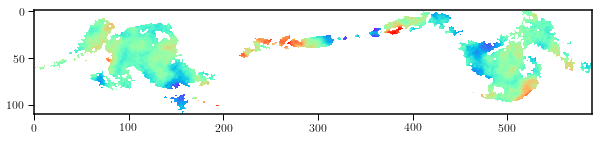

In [70]:
plt.figure(figsize=(10,3))
plt.imshow(rm.data.T, cmap='rainbow')

Note that the white space indicates NaN values.

This is in fact a rotation measure map for the galaxy group 3C449. Rotation measure indicates how the plane of polarization of radio emission rotates as the light propagates through a magnetized medium. The image shape is in fact the small part of the sky in the direction of 3C499 lit up by the powerful radio (synchrotron) source at the center of this group. The stronger the magnetic fields inside the galaxy group are, the stronger (linearly) rotation measure we get.<br>

However, we can take any image with similarly irregular boundaries to calculate its spectrum.

### Calculate the power spectral density

Parameters:<br>
<code>ns</code> (default=30): number of length-scales where the PDS is calculated<br>
<code>smin</code> (default=2, which is the Nyquist frequency): minimum length-scale in pixels<br>
<code>smax</code> (default=largest image dimension): maximum length-scale in pixels<br>
<code>nt</code> (default=1): number of threads for multithreading<br>
<br>
Returns:<br>
<code>k</code>: array of wavenumbers in inverse pixels<br>
<code>pds</code>: array of the PDS at wavenumbers <code>k</code> 

In [48]:
(k,pds)=rm.get_spectrum(ns=20, nt=4)

calculate the PDS...
PDS calculated and saved as out/pds_3c449.txt


### Plot the spectrum

Let's plot the spectrum and compare it with the Kolmogoroff slope -5/3.

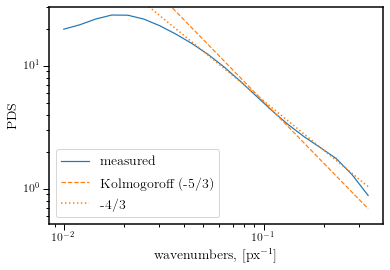

In [88]:
plt.figure(figsize=(6,4))
plt.loglog(k, pds*k**2, label='measured')
plt.loglog(k, 0.11 * k**(-5./3), 'C1--', label='Kolmogoroff (-5/3)')
plt.loglog(k, 0.24 * k**(-4./3), 'C1:', label='-4/3', lw=1.5)
plt.ylim(ymax=30)
plt.xlabel(r'wavenumbers, [${\rm px}^{-1}$]')
plt.ylabel(r'PDS')
plt.legend()

The image we have processed reflects the distribution of turbulent magnetic fields in a galaxy cluster.<br><br>
In some theoretical models the field follows the same spectral shape as velocity perturbations in the classic Kolmogoroff model of fluid turbulence, but in others it can be shallower.